In [1]:
from __future__ import print_function, division
import jupyterthemes.jtplot as jtplot
jtplot.style()
import numpy as np
import pandas as pd
import matplotlib as mpl
import os, shutil, random, sys
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

In [2]:
train_data = pd.read_csv('Week2_Iris鸢尾花数据集/TrainData.csv').values
test_data = pd.read_csv('Week2_Iris鸢尾花数据集/TestData.csv').values

# keras方法

In [8]:
from keras.models import Sequential, Model
from keras.utils import to_categorical  # one_hot编码
from keras.layers import Dense
from keras.layers import Flatten, Activation, Dropout  # 特殊功能层
from keras.optimizers import Adadelta, Adam, RMSprop
from keras import losses, metrics

In [9]:
X_train = train_data[:,:4]
y_train = to_categorical(train_data[:,4])
X_test = test_data[:,:4]
test_y = test_data[:,4]
y_test = to_categorical(test_data[:,4])

Epoch 1/100
120/120 [==============================] - 0s 507us/step - loss: 1.4085 - accuracy: 0.2667
Epoch 2/100
120/120 [==============================] - 0s 83us/step - loss: 1.2033 - accuracy: 0.0500
Epoch 3/100
120/120 [==============================] - 0s 0us/step - loss: 1.1341 - accuracy: 0.2500
Epoch 4/100
120/120 [==============================] - 0s 130us/step - loss: 1.0960 - accuracy: 0.3167
Epoch 5/100
120/120 [==============================] - 0s 0us/step - loss: 1.0548 - accuracy: 0.3667
Epoch 6/100
120/120 [==============================] - 0s 130us/step - loss: 1.0180 - accuracy: 0.3333
Epoch 7/100
120/120 [==============================] - 0s 0us/step - loss: 0.9887 - accuracy: 0.7417
Epoch 8/100
120/120 [==============================] - 0s 0us/step - loss: 0.9520 - accuracy: 0.6917
Epoch 9/100
120/120 [==============================] - 0s 0us/step - loss: 0.9229 - accuracy: 0.7250
Epoch 10/100
120/120 [==============================] - 0s 0us/step - loss: 0.8950 -

120/120 [==============================] - 0s 0us/step - loss: 0.2576 - accuracy: 0.9750
Epoch 81/100
120/120 [==============================] - 0s 0us/step - loss: 0.2565 - accuracy: 0.9667
Epoch 82/100
120/120 [==============================] - 0s 0us/step - loss: 0.2510 - accuracy: 0.9750
Epoch 83/100
120/120 [==============================] - 0s 130us/step - loss: 0.2477 - accuracy: 0.9667
Epoch 84/100
120/120 [==============================] - 0s 0us/step - loss: 0.2506 - accuracy: 0.9667
Epoch 85/100
120/120 [==============================] - 0s 130us/step - loss: 0.2448 - accuracy: 0.9583
Epoch 86/100
120/120 [==============================] - 0s 0us/step - loss: 0.2386 - accuracy: 0.9750
Epoch 87/100
120/120 [==============================] - 0s 130us/step - loss: 0.2366 - accuracy: 0.9750
Epoch 88/100
120/120 [==============================] - 0s 54us/step - loss: 0.2327 - accuracy: 0.9750
Epoch 89/100
120/120 [==============================] - 0s 0us/step - loss: 0.2356 - acc

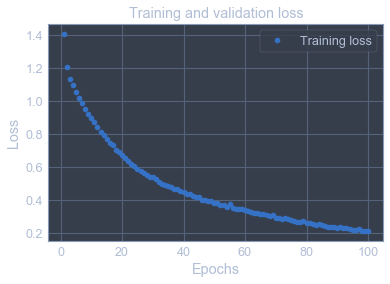

In [27]:
# 搭建网络
model = Sequential()
model.add(Dense(64,input_dim=4, activation='relu'))
model.add(Dense(3,input_dim=64,activation='softmax'))

# 编译模型
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 训练模型
cost = model.fit(X_train,
                 y_train,
                 epochs=100)

loss = cost.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
loss[-1]

0.20759728054205576

In [23]:
y_pred = model.predict_classes(X_test)

confusion_matrix(test_y,y_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

# 增加层数

Epoch 1/100
120/120 [==============================] - 0s 835us/step - loss: 1.0977 - accuracy: 0.3250
Epoch 2/100
120/120 [==============================] - 0s 0us/step - loss: 1.0464 - accuracy: 0.7083
Epoch 3/100
120/120 [==============================] - 0s 0us/step - loss: 1.0141 - accuracy: 0.6667
Epoch 4/100
120/120 [==============================] - 0s 0us/step - loss: 0.9800 - accuracy: 0.6667
Epoch 5/100
120/120 [==============================] - 0s 0us/step - loss: 0.9437 - accuracy: 0.8167
Epoch 6/100
120/120 [==============================] - 0s 0us/step - loss: 0.9026 - accuracy: 0.6750
Epoch 7/100
120/120 [==============================] - 0s 0us/step - loss: 0.8535 - accuracy: 0.7917
Epoch 8/100
120/120 [==============================] - 0s 0us/step - loss: 0.8062 - accuracy: 0.8917
Epoch 9/100
120/120 [==============================] - 0s 0us/step - loss: 0.7586 - accuracy: 0.8333
Epoch 10/100
120/120 [==============================] - 0s 0us/step - loss: 0.7120 - accu

120/120 [==============================] - 0s 0us/step - loss: 0.1172 - accuracy: 0.9500
Epoch 81/100
120/120 [==============================] - 0s 130us/step - loss: 0.1136 - accuracy: 0.9583
Epoch 82/100
120/120 [==============================] - 0s 0us/step - loss: 0.1077 - accuracy: 0.9583
Epoch 83/100
120/120 [==============================] - 0s 130us/step - loss: 0.1011 - accuracy: 0.9667
Epoch 84/100
120/120 [==============================] - 0s 0us/step - loss: 0.1181 - accuracy: 0.9583
Epoch 85/100
120/120 [==============================] - 0s 130us/step - loss: 0.1068 - accuracy: 0.9583
Epoch 86/100
120/120 [==============================] - 0s 0us/step - loss: 0.1123 - accuracy: 0.9500
Epoch 87/100
120/120 [==============================] - 0s 130us/step - loss: 0.1026 - accuracy: 0.9583
Epoch 88/100
120/120 [==============================] - 0s 0us/step - loss: 0.1291 - accuracy: 0.9250
Epoch 89/100
120/120 [==============================] - 0s 0us/step - loss: 0.1028 - ac

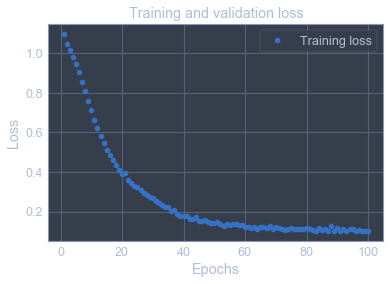

In [29]:
# 搭建网络
model = Sequential()
model.add(Dense(8,input_dim=4, activation='relu'))
model.add(Dense(32,input_dim=8,activation='relu'))
model.add(Dense(64,input_dim=32,activation='relu'))
model.add(Dense(3,input_dim=64,activation='softmax'))

# 编译模型
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 训练模型
cost = model.fit(X_train,
                 y_train,
                 epochs=100)

loss = cost.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
loss[-1]

0.1028614675005277

In [31]:
y_pred = model.predict_classes(X_test)
confusion_matrix(test_y,y_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

## 增加层数同时减少迭代次数

Epoch 1/5
120/120 [==============================] - 0s 1ms/step - loss: 1.0754 - accuracy: 0.2917
Epoch 2/5
120/120 [==============================] - 0s 83us/step - loss: 1.0060 - accuracy: 0.3333
Epoch 3/5
120/120 [==============================] - 0s 0us/step - loss: 0.9716 - accuracy: 0.3250
Epoch 4/5
120/120 [==============================] - 0s 130us/step - loss: 0.9308 - accuracy: 0.4667
Epoch 5/5
120/120 [==============================] - 0s 0us/step - loss: 0.8915 - accuracy: 0.6167
Epoch 1/10
120/120 [==============================] - 0s 1ms/step - loss: 1.1164 - accuracy: 0.2833
Epoch 2/10
120/120 [==============================] - 0s 0us/step - loss: 1.0839 - accuracy: 0.3250
Epoch 3/10
120/120 [==============================] - 0s 130us/step - loss: 1.0612 - accuracy: 0.4167
Epoch 4/10
120/120 [==============================] - 0s 0us/step - loss: 1.0407 - accuracy: 0.4750
Epoch 5/10
120/120 [==============================] - 0s 130us/step - loss: 1.0209 - accuracy: 0.516

120/120 [==============================] - 0s 0us/step - loss: 0.4948 - accuracy: 0.7667
Epoch 17/50
120/120 [==============================] - 0s 130us/step - loss: 0.4820 - accuracy: 0.7667
Epoch 18/50
120/120 [==============================] - 0s 0us/step - loss: 0.4637 - accuracy: 0.7167
Epoch 19/50
120/120 [==============================] - 0s 130us/step - loss: 0.4555 - accuracy: 0.7750
Epoch 20/50
120/120 [==============================] - 0s 0us/step - loss: 0.4441 - accuracy: 0.9250
Epoch 21/50
120/120 [==============================] - 0s 130us/step - loss: 0.4323 - accuracy: 0.8583
Epoch 22/50
120/120 [==============================] - 0s 0us/step - loss: 0.4210 - accuracy: 0.8750
Epoch 23/50
120/120 [==============================] - 0s 130us/step - loss: 0.4195 - accuracy: 0.8750
Epoch 24/50
120/120 [==============================] - 0s 0us/step - loss: 0.4121 - accuracy: 0.8417
Epoch 25/50
120/120 [==============================] - 0s 131us/step - loss: 0.3983 - accuracy:

120/120 [==============================] - 0s 130us/step - loss: 0.1483 - accuracy: 0.9583
Epoch 47/75
120/120 [==============================] - 0s 0us/step - loss: 0.1513 - accuracy: 0.9333
Epoch 48/75
120/120 [==============================] - 0s 0us/step - loss: 0.1493 - accuracy: 0.9583
Epoch 49/75
120/120 [==============================] - 0s 130us/step - loss: 0.1381 - accuracy: 0.9667
Epoch 50/75
120/120 [==============================] - 0s 54us/step - loss: 0.1493 - accuracy: 0.9500
Epoch 51/75
120/120 [==============================] - 0s 130us/step - loss: 0.1281 - accuracy: 0.9750
Epoch 52/75
120/120 [==============================] - 0s 0us/step - loss: 0.1332 - accuracy: 0.9667
Epoch 53/75
120/120 [==============================] - 0s 131us/step - loss: 0.1414 - accuracy: 0.9500
Epoch 54/75
120/120 [==============================] - 0s 83us/step - loss: 0.1345 - accuracy: 0.9500
Epoch 55/75
120/120 [==============================] - 0s 0us/step - loss: 0.1247 - accuracy:

120/120 [==============================] - 0s 139us/step - loss: 0.1624 - accuracy: 0.9583
Epoch 51/100
120/120 [==============================] - 0s 0us/step - loss: 0.1719 - accuracy: 0.9333
Epoch 52/100
120/120 [==============================] - 0s 0us/step - loss: 0.1586 - accuracy: 0.9500
Epoch 53/100
120/120 [==============================] - 0s 130us/step - loss: 0.1519 - accuracy: 0.9417
Epoch 54/100
120/120 [==============================] - 0s 0us/step - loss: 0.1511 - accuracy: 0.9583
Epoch 55/100
120/120 [==============================] - 0s 0us/step - loss: 0.1579 - accuracy: 0.9417
Epoch 56/100
120/120 [==============================] - 0s 130us/step - loss: 0.1468 - accuracy: 0.9500
Epoch 57/100
120/120 [==============================] - 0s 0us/step - loss: 0.1513 - accuracy: 0.9333
Epoch 58/100
120/120 [==============================] - 0s 130us/step - loss: 0.1597 - accuracy: 0.9333
Epoch 59/100
120/120 [==============================] - 0s 0us/step - loss: 0.1386 - ac

120/120 [==============================] - 0s 0us/step - loss: 0.3749 - accuracy: 0.9083
Epoch 30/125
120/120 [==============================] - 0s 0us/step - loss: 0.3646 - accuracy: 0.9333
Epoch 31/125
120/120 [==============================] - 0s 130us/step - loss: 0.3485 - accuracy: 0.9667
Epoch 32/125
120/120 [==============================] - 0s 0us/step - loss: 0.3451 - accuracy: 0.9250
Epoch 33/125
120/120 [==============================] - 0s 54us/step - loss: 0.3392 - accuracy: 0.9000
Epoch 34/125
120/120 [==============================] - 0s 0us/step - loss: 0.3126 - accuracy: 0.9583
Epoch 35/125
120/120 [==============================] - 0s 130us/step - loss: 0.3114 - accuracy: 0.9333
Epoch 36/125
120/120 [==============================] - 0s 0us/step - loss: 0.3026 - accuracy: 0.9417
Epoch 37/125
120/120 [==============================] - 0s 0us/step - loss: 0.2826 - accuracy: 0.9500
Epoch 38/125
120/120 [==============================] - 0s 130us/step - loss: 0.2724 - acc

120/120 [==============================] - 0s 130us/step - loss: 0.1033 - accuracy: 0.9500
Epoch 109/125
120/120 [==============================] - 0s 0us/step - loss: 0.1068 - accuracy: 0.9583
Epoch 110/125
120/120 [==============================] - 0s 130us/step - loss: 0.0875 - accuracy: 0.9833
Epoch 111/125
120/120 [==============================] - 0s 0us/step - loss: 0.0884 - accuracy: 0.9583
Epoch 112/125
120/120 [==============================] - 0s 0us/step - loss: 0.0950 - accuracy: 0.9583
Epoch 113/125
120/120 [==============================] - 0s 130us/step - loss: 0.0945 - accuracy: 0.9667
Epoch 114/125
120/120 [==============================] - 0s 0us/step - loss: 0.0857 - accuracy: 0.9750
Epoch 115/125
120/120 [==============================] - 0s 130us/step - loss: 0.0926 - accuracy: 0.9667
Epoch 116/125
120/120 [==============================] - 0s 0us/step - loss: 0.0995 - accuracy: 0.9583
Epoch 117/125
120/120 [==============================] - 0s 130us/step - loss: 

120/120 [==============================] - 0s 130us/step - loss: 0.1571 - accuracy: 0.9250
Epoch 63/150
120/120 [==============================] - 0s 0us/step - loss: 0.1424 - accuracy: 0.9500
Epoch 64/150
120/120 [==============================] - 0s 130us/step - loss: 0.1438 - accuracy: 0.9333
Epoch 65/150
120/120 [==============================] - 0s 0us/step - loss: 0.1380 - accuracy: 0.9500
Epoch 66/150
120/120 [==============================] - 0s 130us/step - loss: 0.1299 - accuracy: 0.9667
Epoch 67/150
120/120 [==============================] - 0s 0us/step - loss: 0.1342 - accuracy: 0.9500
Epoch 68/150
120/120 [==============================] - 0s 130us/step - loss: 0.1274 - accuracy: 0.9333
Epoch 69/150
120/120 [==============================] - 0s 0us/step - loss: 0.1250 - accuracy: 0.9500
Epoch 70/150
120/120 [==============================] - 0s 185us/step - loss: 0.1323 - accuracy: 0.9500
Epoch 71/150
120/120 [==============================] - 0s 0us/step - loss: 0.1613 - 

120/120 [==============================] - 0s 131us/step - loss: 0.0974 - accuracy: 0.9667
Epoch 142/150
120/120 [==============================] - 0s 0us/step - loss: 0.0976 - accuracy: 0.9500
Epoch 143/150
120/120 [==============================] - 0s 130us/step - loss: 0.1150 - accuracy: 0.9583
Epoch 144/150
120/120 [==============================] - 0s 0us/step - loss: 0.0948 - accuracy: 0.9667
Epoch 145/150
120/120 [==============================] - 0s 130us/step - loss: 0.1037 - accuracy: 0.9750
Epoch 146/150
120/120 [==============================] - 0s 0us/step - loss: 0.1243 - accuracy: 0.9583
Epoch 147/150
120/120 [==============================] - 0s 130us/step - loss: 0.1187 - accuracy: 0.9333
Epoch 148/150
120/120 [==============================] - 0s 0us/step - loss: 0.0970 - accuracy: 0.9583
Epoch 149/150
120/120 [==============================] - 0s 130us/step - loss: 0.0910 - accuracy: 0.9583
Epoch 150/150
120/120 [==============================] - 0s 0us/step - loss: 

120/120 [==============================] - 0s 54us/step - loss: 0.1467 - accuracy: 0.9417
Epoch 71/175
120/120 [==============================] - 0s 0us/step - loss: 0.1447 - accuracy: 0.9500
Epoch 72/175
120/120 [==============================] - 0s 0us/step - loss: 0.1417 - accuracy: 0.9417
Epoch 73/175
120/120 [==============================] - 0s 130us/step - loss: 0.1299 - accuracy: 0.9583
Epoch 74/175
120/120 [==============================] - 0s 0us/step - loss: 0.1335 - accuracy: 0.9583
Epoch 75/175
120/120 [==============================] - 0s 130us/step - loss: 0.1255 - accuracy: 0.9750
Epoch 76/175
120/120 [==============================] - 0s 0us/step - loss: 0.1397 - accuracy: 0.9417
Epoch 77/175
120/120 [==============================] - 0s 0us/step - loss: 0.1188 - accuracy: 0.9583
Epoch 78/175
120/120 [==============================] - 0s 130us/step - loss: 0.1212 - accuracy: 0.9750
Epoch 79/175
120/120 [==============================] - 0s 0us/step - loss: 0.1531 - acc

120/120 [==============================] - 0s 54us/step - loss: 0.0928 - accuracy: 0.9583
Epoch 150/175
120/120 [==============================] - 0s 0us/step - loss: 0.0924 - accuracy: 0.9500
Epoch 151/175
120/120 [==============================] - 0s 131us/step - loss: 0.0826 - accuracy: 0.9667
Epoch 152/175
120/120 [==============================] - 0s 0us/step - loss: 0.0907 - accuracy: 0.9667
Epoch 153/175
120/120 [==============================] - 0s 130us/step - loss: 0.0900 - accuracy: 0.9750
Epoch 154/175
120/120 [==============================] - 0s 0us/step - loss: 0.1090 - accuracy: 0.9417
Epoch 155/175
120/120 [==============================] - 0s 0us/step - loss: 0.1146 - accuracy: 0.9500
Epoch 156/175
120/120 [==============================] - 0s 130us/step - loss: 0.0807 - accuracy: 0.9750
Epoch 157/175
120/120 [==============================] - 0s 0us/step - loss: 0.0959 - accuracy: 0.9500
Epoch 158/175
120/120 [==============================] - 0s 130us/step - loss: 0

120/120 [==============================] - 0s 84us/step - loss: 0.1671 - accuracy: 0.9500
Epoch 54/200
120/120 [==============================] - 0s 84us/step - loss: 0.1621 - accuracy: 0.9417
Epoch 55/200
120/120 [==============================] - 0s 84us/step - loss: 0.1600 - accuracy: 0.9333
Epoch 56/200
120/120 [==============================] - 0s 84us/step - loss: 0.1506 - accuracy: 0.9500
Epoch 57/200
120/120 [==============================] - 0s 67us/step - loss: 0.1507 - accuracy: 0.9583
Epoch 58/200
120/120 [==============================] - 0s 84us/step - loss: 0.1754 - accuracy: 0.9250
Epoch 59/200
120/120 [==============================] - 0s 84us/step - loss: 0.1551 - accuracy: 0.9250
Epoch 60/200
120/120 [==============================] - 0s 84us/step - loss: 0.1503 - accuracy: 0.9333
Epoch 61/200
120/120 [==============================] - 0s 84us/step - loss: 0.1637 - accuracy: 0.9250
Epoch 62/200
120/120 [==============================] - 0s 84us/step - loss: 0.1415 - 

120/120 [==============================] - 0s 130us/step - loss: 0.1050 - accuracy: 0.9333
Epoch 132/200
120/120 [==============================] - 0s 0us/step - loss: 0.1375 - accuracy: 0.9083
Epoch 133/200
120/120 [==============================] - 0s 130us/step - loss: 0.1070 - accuracy: 0.9583
Epoch 134/200
120/120 [==============================] - 0s 0us/step - loss: 0.0975 - accuracy: 0.9583
Epoch 135/200
120/120 [==============================] - 0s 130us/step - loss: 0.1023 - accuracy: 0.9667
Epoch 136/200
120/120 [==============================] - 0s 0us/step - loss: 0.1077 - accuracy: 0.9583
Epoch 137/200
120/120 [==============================] - 0s 0us/step - loss: 0.0951 - accuracy: 0.9583
Epoch 138/200
120/120 [==============================] - 0s 130us/step - loss: 0.1214 - accuracy: 0.9500
Epoch 139/200
120/120 [==============================] - 0s 130us/step - loss: 0.1304 - accuracy: 0.9333
Epoch 140/200
120/120 [==============================] - 0s 0us/step - loss: 

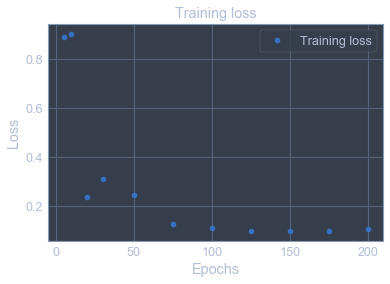

In [36]:
# 搭建网络
losses = []
epochs = [5,10,20,30,50,75,100,125,150,175,200]

for epoch in epochs:
    model = Sequential()
    model.add(Dense(8,input_dim=4, activation='relu'))
    model.add(Dense(32,input_dim=8,activation='relu'))
    model.add(Dense(64,input_dim=32,activation='relu'))
    model.add(Dense(3,input_dim=64,activation='softmax'))

    # 编译模型
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 训练模型
    cost = model.fit(X_train,
                 y_train,
                 epochs=epoch)

    losses.append(cost.history['loss'][-1])
    

plt.plot(epochs, losses, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
y_pred = model.predict_classes(X_test)

confusion_matrix(test_y,y_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

# 增加神经元

Epoch 1/50
120/120 [==============================] - 0s 2ms/step - loss: 0.8541 - accuracy: 0.5750
Epoch 2/50
120/120 [==============================] - 0s 130us/step - loss: 0.8081 - accuracy: 0.6583
Epoch 3/50
120/120 [==============================] - 0s 130us/step - loss: 0.7803 - accuracy: 0.7250
Epoch 4/50
120/120 [==============================] - 0s 0us/step - loss: 0.7593 - accuracy: 0.7667
Epoch 5/50
120/120 [==============================] - 0s 0us/step - loss: 0.7394 - accuracy: 0.8250
Epoch 6/50
120/120 [==============================] - 0s 130us/step - loss: 0.7217 - accuracy: 0.8583
Epoch 7/50
120/120 [==============================] - 0s 130us/step - loss: 0.7041 - accuracy: 0.8833
Epoch 8/50
120/120 [==============================] - 0s 130us/step - loss: 0.6859 - accuracy: 0.8917
Epoch 9/50
120/120 [==============================] - 0s 0us/step - loss: 0.6659 - accuracy: 0.9000
Epoch 10/50
120/120 [==============================] - 0s 130us/step - loss: 0.6470 - accu

120/120 [==============================] - 0s 0us/step - loss: 1.2725 - accuracy: 0.1333
Epoch 32/50
120/120 [==============================] - 0s 130us/step - loss: 1.2544 - accuracy: 0.1917
Epoch 33/50
120/120 [==============================] - 0s 0us/step - loss: 1.2389 - accuracy: 0.2750
Epoch 34/50
120/120 [==============================] - 0s 130us/step - loss: 1.2228 - accuracy: 0.2667
Epoch 35/50
120/120 [==============================] - 0s 130us/step - loss: 1.2109 - accuracy: 0.2500
Epoch 36/50
120/120 [==============================] - 0s 0us/step - loss: 1.1954 - accuracy: 0.2750
Epoch 37/50
120/120 [==============================] - 0s 130us/step - loss: 1.1829 - accuracy: 0.3000
Epoch 38/50
120/120 [==============================] - 0s 0us/step - loss: 1.1714 - accuracy: 0.2833
Epoch 39/50
120/120 [==============================] - 0s 130us/step - loss: 1.1576 - accuracy: 0.3167
Epoch 40/50
120/120 [==============================] - 0s 130us/step - loss: 1.1451 - accurac

120/120 [==============================] - 0s 130us/step - loss: 0.6557 - accuracy: 0.8917
Epoch 12/50
120/120 [==============================] - 0s 54us/step - loss: 0.6353 - accuracy: 0.7583
Epoch 13/50
120/120 [==============================] - 0s 0us/step - loss: 0.6183 - accuracy: 0.8083
Epoch 14/50
120/120 [==============================] - 0s 0us/step - loss: 0.6064 - accuracy: 0.7750
Epoch 15/50
120/120 [==============================] - 0s 130us/step - loss: 0.5852 - accuracy: 0.8750
Epoch 16/50
120/120 [==============================] - 0s 0us/step - loss: 0.5783 - accuracy: 0.8333
Epoch 17/50
120/120 [==============================] - 0s 0us/step - loss: 0.5611 - accuracy: 0.8667
Epoch 18/50
120/120 [==============================] - 0s 130us/step - loss: 0.5465 - accuracy: 0.8833
Epoch 19/50
120/120 [==============================] - 0s 0us/step - loss: 0.5368 - accuracy: 0.8750
Epoch 20/50
120/120 [==============================] - 0s 130us/step - loss: 0.5237 - accuracy: 

120/120 [==============================] - 0s 0us/step - loss: 0.3546 - accuracy: 0.8917
Epoch 42/50
120/120 [==============================] - 0s 75us/step - loss: 0.3361 - accuracy: 0.9417
Epoch 43/50
120/120 [==============================] - 0s 0us/step - loss: 0.3274 - accuracy: 0.9583
Epoch 44/50
120/120 [==============================] - 0s 130us/step - loss: 0.3274 - accuracy: 0.9250
Epoch 45/50
120/120 [==============================] - 0s 130us/step - loss: 0.3209 - accuracy: 0.9417
Epoch 46/50
120/120 [==============================] - 0s 0us/step - loss: 0.3130 - accuracy: 0.9167
Epoch 47/50
120/120 [==============================] - 0s 130us/step - loss: 0.3169 - accuracy: 0.9417
Epoch 48/50
120/120 [==============================] - 0s 109us/step - loss: 0.3060 - accuracy: 0.9333
Epoch 49/50
120/120 [==============================] - 0s 48us/step - loss: 0.2993 - accuracy: 0.9500
Epoch 50/50
120/120 [==============================] - 0s 83us/step - loss: 0.2969 - accuracy

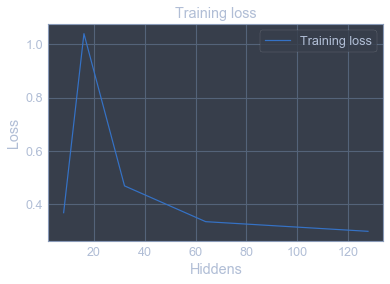

In [40]:
# 搭建网络
hiddens = [8,16,32,64,128]
losses = []
for hidden in hiddens:
    model = Sequential()
    model.add(Dense(hidden,input_dim=4, activation='relu'))
    model.add(Dense(3,input_dim=hidden,activation='softmax'))

    # 编译模型
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    # 训练模型
    cost = model.fit(X_train,
                 y_train,
                 epochs=50)

    losses.append(cost.history['loss'][-1])

plt.plot(hiddens, losses, label='Training loss')
plt.title('Training loss')
plt.xlabel('Hiddens')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
y_pred = model.predict_classes(X_test)
confusion_matrix(test_y,y_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

# 改变优化函数

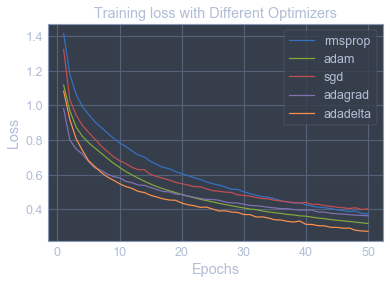

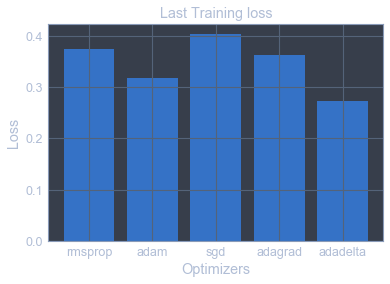

In [49]:
# 搭建网络
opts = ['rmsprop', 'adam', 'sgd', 'adagrad', 'adadelta']
losses = []
for opt in opts:
    model = Sequential()
    model.add(Dense(64, input_dim=4, activation='relu'))
    model.add(Dense(3, input_dim=64, activation='softmax'))

    # 编译模型
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # 训练模型
    cost = model.fit(X_train, y_train, epochs=50, verbose=0)

    losses.append(cost.history['loss'][-1])
    loss = cost.history['loss']
    epochs = range(1, 50 + 1)
    plt.plot(epochs, loss, label='%s' % opt)

plt.title('Training loss with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.bar(opts, losses)
plt.title('Last Training loss')
plt.xlabel('Optimizers')
plt.ylabel('Loss')
plt.show()